In [ ]:
from bs4 import BeautifulSoup
import os
import requests
from datetime import timedelta
from datetime import datetime as dt
import ast
import time
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}

In [ ]:
scraped_links = []
titles = []
counter = 0
base_url = "https://www.euro2day.gr/SearchRes.aspx?q=πανδημια&df=14052021&dt=07072021&p="
for i in range(1,45):
    url = base_url + str(i)
    page = requests.get(url, headers = headers)
    s = BeautifulSoup(page.content, 'html.parser')
    links = s.select("div.list-item h3 a")
    links = set(links)
    
    url = ["https://www.euro2day.gr" + link['href'] for link in links]
    
    
    for l in url:
      link = l
      print(l)
      scraped_links.append(l)

 


print(len(scraped_links)) 

scraped_links = (set(scraped_links))

In [ ]:
text_list=[]
for i in scraped_links:  
    dic = {}
    page = requests.get(i, headers = headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    
    title = soup.select("h1")

    if (title):
        dic['title'] = soup.select("title")[0].text.strip()
    else:
        print("ARTICLE NO: ", i, " HAS NO TITLE")
        dic['title'] = "NO TITLE"
    
        
    date = soup.select("div.post-date p strong")
    if (date):
        dic['date'] = soup.select("div.post-date p strong")[0].text.strip()
    else:
        print("ARTICLE NO: ", i, " HAS NO date")
        dic['date'] = "NO date"
        
        
    category = soup.select("ul.article-category li")
    if (category):
        dic['category'] = soup.select("ul.article-category li")[0].text.strip()
    else:
        print("ARTICLE NO: ", i, " HAS NO author")
        dic['category'] = "NO category"        
        
    
    article =  soup.select("article#textforresizing")
    if (article):
        dic['body'] = soup.select("article#textforresizing")[0].text
    else:
        print("ARTICLE NO: ", i, " HAS NO body")
        dic['body'] = "NO body"  
  
    
    dic['url'] = i

    
    text_list.append(dic)
    #print(dic)
    
    time.sleep(0.5)

In [ ]:
df = pd.DataFrame(text_list)

In [ ]:
df['body'] = df['body'].str.strip()

In [ ]:
df.head(2)

,title,date,category,body,url
0,Εργάζονται κανονικά οι μισοί Ελληνες παρά το l...,29 Μαρτίου 2021 - 13:33,ΕΙΔΗΣΕΙΣ,Από τον Απρίλιο του 2020 η διαΝΕΟσις έχει ξεκι...,https://www.euro2day.gr/news/economy/article/2...
1,NYT: Οι εμβολιασμένοι Αμερικανοί θα μπορούν σύ...,26 Απριλίου 2021 - 07:17,ΕΙΔΗΣΕΙΣ,Οι τουρίστες από τις ΗΠΑ θα έχουν τους προσεχε...,https://www.euro2day.gr/news/world/article/207...


In [ ]:
df['date'] = df['date'].str.replace('Ιανουαρίου', "January")
df['date'] = df['date'].str.replace('Φεβρουαρίου', "February")
df['date'] = df['date'].str.replace('Μαρτίου', "March")
df['date'] = df['date'].str.replace('Απριλίου', "Aprin")
df['date'] = df['date'].str.replace('Μαΐου', "May")
df['date'] = df['date'].str.replace('Ιουνίου', "June")
df['date'] = df['date'].str.replace('Ιουλίου', "July")
df['date'] = df['date'].str.replace('Αυγούστου', "August")
df['date'] = df['date'].str.replace('Σεπτεμβρίου', "September")
df['date'] = df['date'].str.replace('Οκτωβρίου', "October")
df['date'] = df['date'].str.replace('Νοεμβρίου', "November")
df['date'] = df['date'].str.replace('Δεκεμβρίου', "December")

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df['date'].dt.date
df['year'] = df['date'].dt.strftime('%Y')
df['month'] = df['date'].dt.strftime('%m')
df['day'] = df['date'].dt.strftime('%d')
df = df[df['date'].notnull()]
df.head(2)

,title,date,category,body,url,year,month,day
0,ΜΙG: Διευκρινίσεις για τη ΓΣ στις 2/6,2021-05-27 16:34:00,ΧΡΗΜ. ΑΝΑΚΟΙΝΩΣΕΙΣ,Σε συνέχεια της από 12.5.2021 Πρόσκλησης Τακτι...,https://www.euro2day.gr/market_announcements/a...,2021,05,27
1,Γεννηματά: Απέναντι στην απορρύθμιση της εργασ...,2021-05-26 21:05:00,ΕΙΔΗΣΕΙΣ,Διαδικτυακή εκδήλωση-συζήτηση με τίτλο «Η εργα...,https://www.euro2day.gr/news/economy/article/2...,2021,05,26


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df.to_csv("DF21.csv", index=False)
!cp DF21.csv "drive/My Drive/final project/"

Text(0.5, 1.0, 'Κατηγορίες Άρθρων 2021')

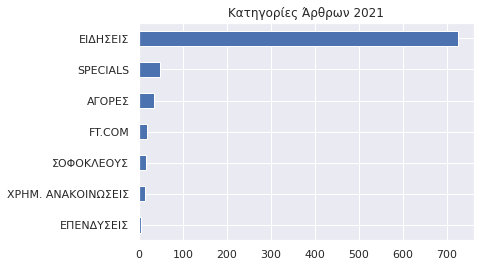

In [ ]:
df['category'].value_counts(ascending = True).plot.barh()
plt.title('Κατηγορίες Άρθρων 2021')

In [ ]:
df['length'] =  df['body'].apply(len)

In [ ]:
df['length'].mean()

4551.876887340302

In [ ]:
import re
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
from wordcloud import WordCloud, STOPWORDS
add_stop = ['πανδημία', 'πανδημίας']

In [ ]:
text = df['body'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
len(text)

3919994

In [ ]:
nlp = spacy.load('el_core_news_sm')
nlp.max_length = 3991352

In [ ]:
full_doc = nlp(text)
clear_text = ' '.join(token.lemma_ for token in full_doc)

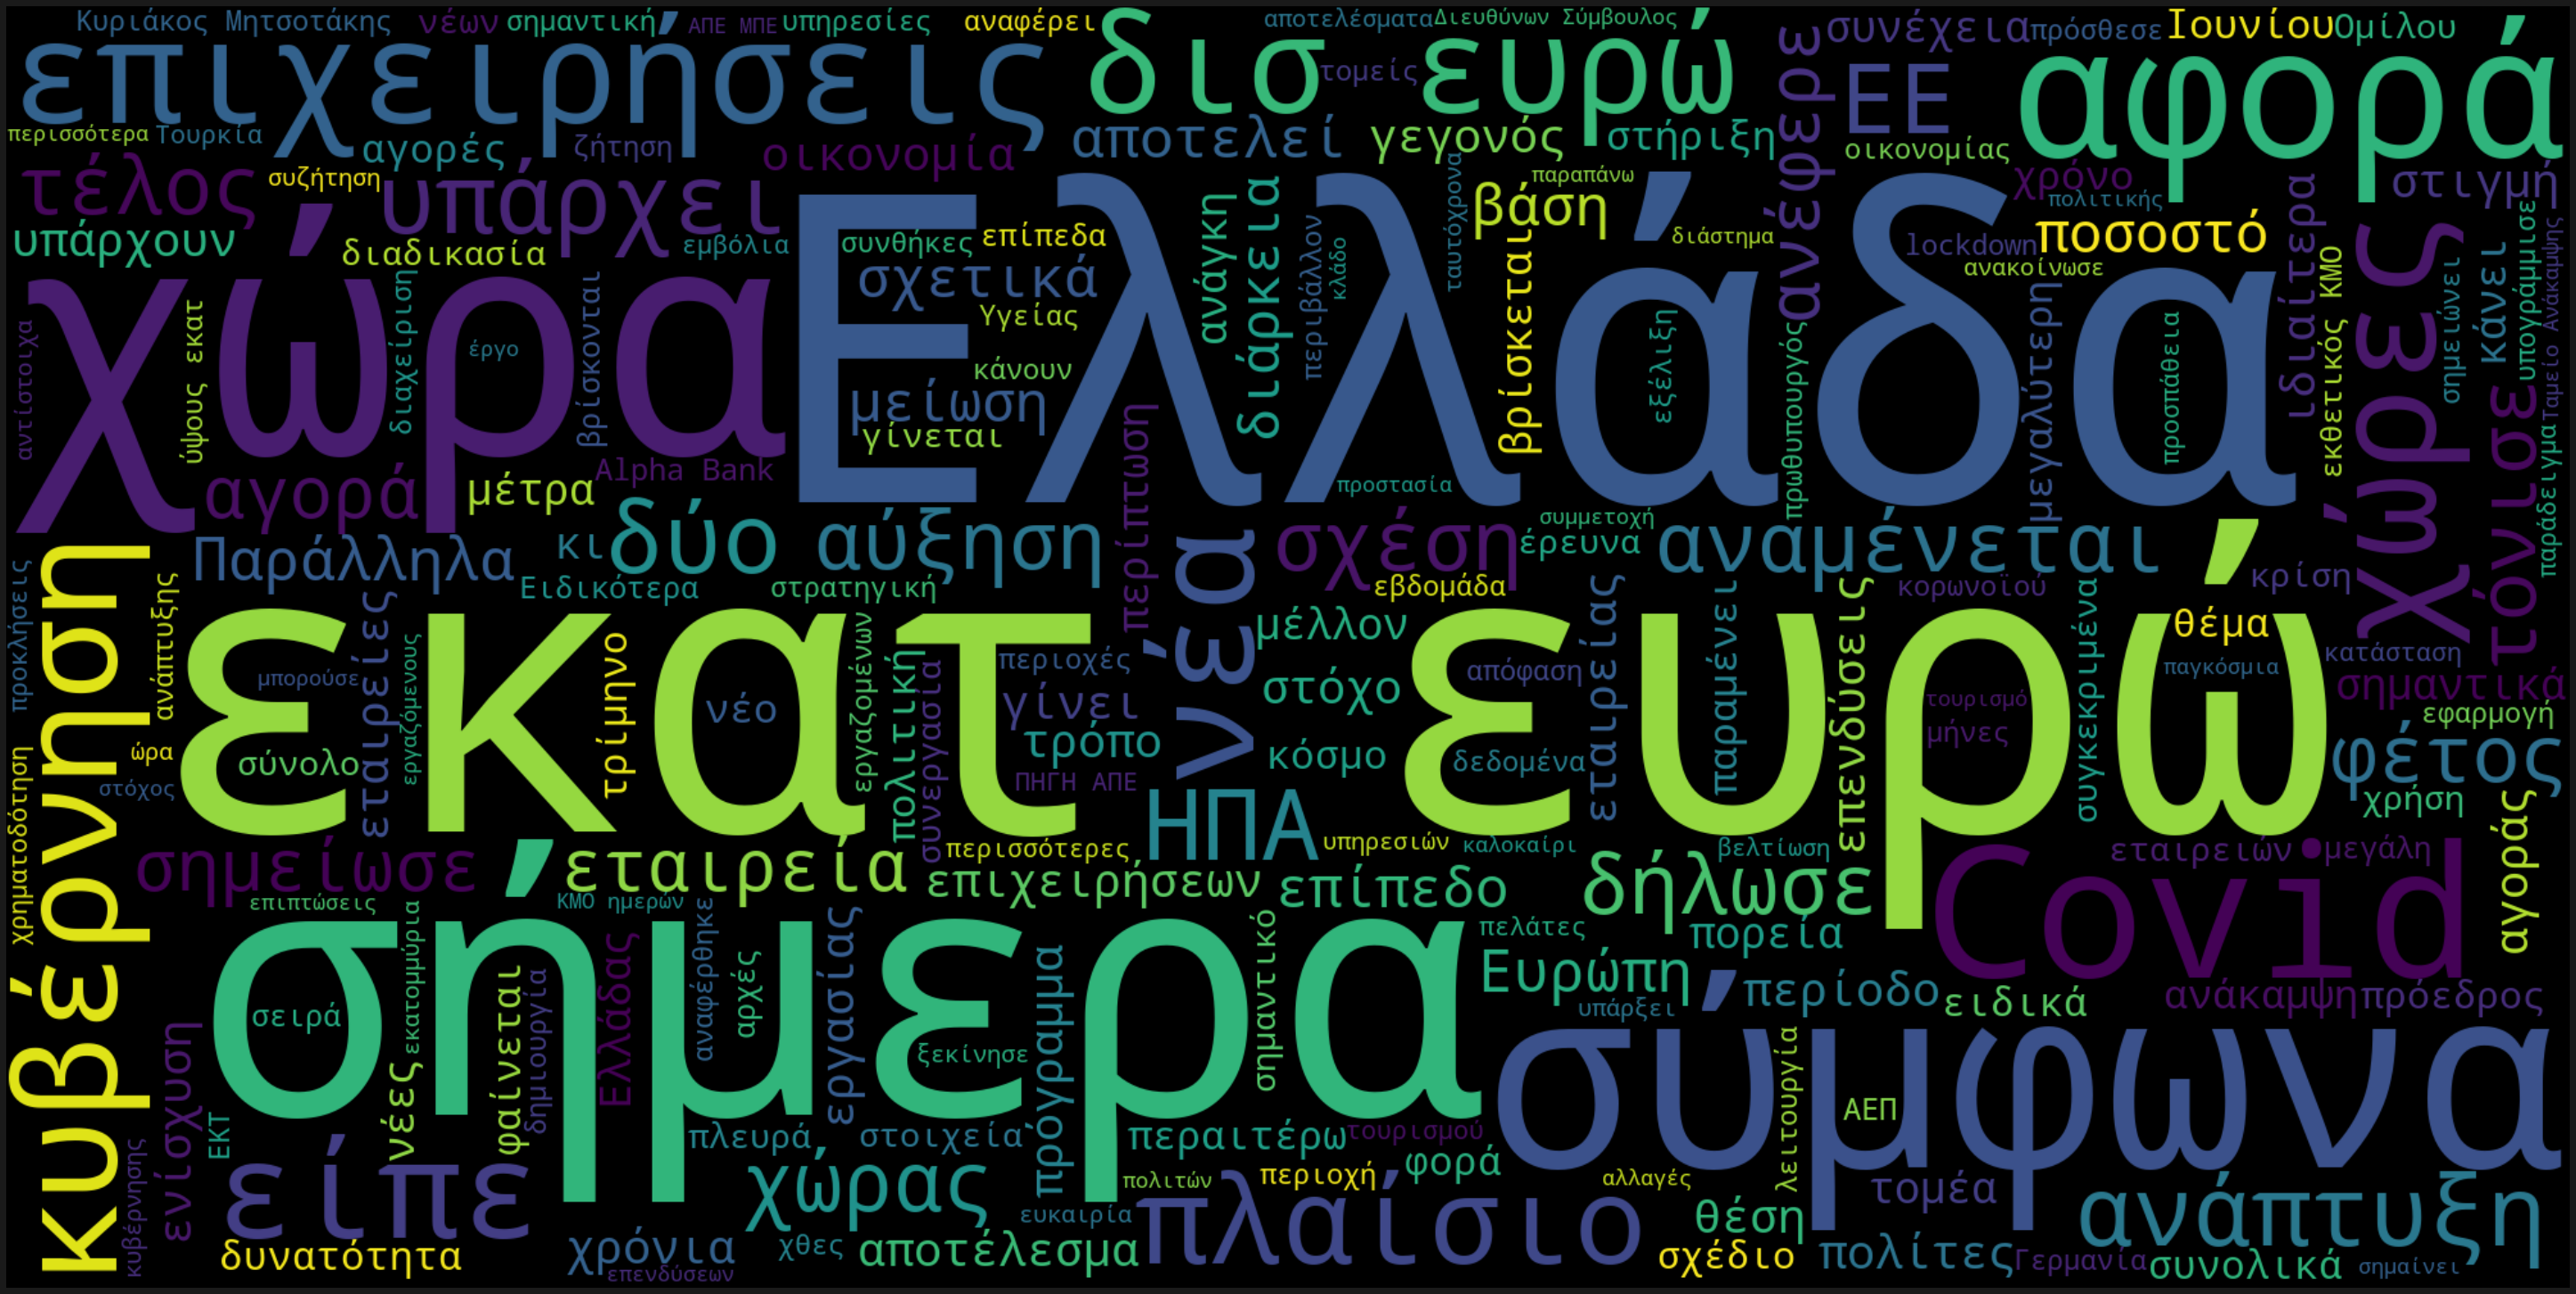

In [ ]:
wordcloud = WordCloud(
    stopwords = list(nlp.Defaults.stop_words) + list(STOPWORDS) + list(add_stop),
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df['body'])

In [ ]:
count_vector.shape

(861, 39224)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,00,000,000κεφάλαιο,001,002,0025,003,004,005,006,007,008,009,0099779645,00ηλεκτρονική,00ημερομηνία,01,010,0105031205,011,012,013,016,017,018,019,019038,02,02004,021,02264,023,024,026,027,028,03,030,031,032,...,ύπατος,ύποπτες,ύποπτο,ύπουλο,ύπουλος,ύστατη,ύστατης,ύστατο,ύστερα,ύφεση,ύφεσης,ύφεσηςτο,ύφος,ύψη,ύψηη,ύψιστη,ύψιστης,ύψιστο,ύψος,ύψοςως,ύψους,ύψωσαν,ώθησαν,ώθησε,ώθηση,ώθησης,ώμους,ώμων,ώρα,ώρες,ώριμα,ώριμες,ώριμη,ώριμο,ώριμου,ώριμων,ώς,ώσπου,ώστε,ώστοσο
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]

    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words) + list(STOPWORDS) + list(add_stop), max_features=20)
count_vector = cv.fit_transform(df['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,19,2020,2021,covid,αγορά,αύξηση,δισ,δύο,εκατ,ελλάδα,επιχειρήσεις,εργασίας,ευρώ,μονάδες,νέα,σήμερα,σύμφωνα,υγείας,χώρα,χώρες
0,3,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,12,0,0,2,2,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,10,0,8,0,0,0,0,0,0,0,0,2,9
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0


Text(0.5, 1.0, 'Συχνότερες Λέξεις 2021')

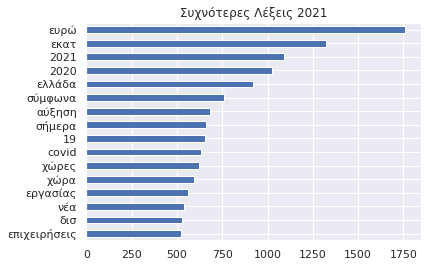

In [ ]:
results.sum(axis =0).sort_values(ascending = True).tail(16).plot.barh()
plt.title('Συχνότερες Λέξεις 2021')

In [ ]:
from textblob import TextBlob
from nltk.util import ngrams

In [ ]:
words = text.split()

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, ngram_range=(2, 2))
count_vector = cv.fit_transform(df['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,00 00,00 01,00 06,00 13,00 15,00 154,00 17,00 18,00 25,00 30,00 55,00 645,00 79,00 90,00 alpha,00 ii,00 άνοδο,00 αποφάσεις,00 αρθεί,00 αριθμός,00 βράδυ,00 βρέθηκε,00 δεύτερη,00 δημο,00 εβδομάδα,00 εθνική,00 εκατ,00 ενέχυρο,00 ευρώ,00 ημερήσιο,00 θέματα,00 θέσεις,00 ιδιωτικη,00 ισπανική,00 κίτρινες,00 καθημερινές,00 καταλωνία,00 λαμβάνοντας,00 μεσάνυχτα,00 μετοχή,...,ώρες εργασίας,ώρες ημέρα,ώρες λειτουργίας,ώρες μεσημέρι,ώρες μετακίνησης,ώρες μεταφέρουν,ώρες νωρίτερα,ώρες ξένο,ώρες ολόκληρες,ώρες παγκόσμιος,ώρες περίοδο,ώρες περιοχές,ώρες πιστοποιητικό,ώρες σπαστό,ώρες συνήθιζαν,ώρες συναλλαγών,ώρες συνεδρίασης,ώρες ταξίδι,ώρες τελειώνοντας,ώρες τουρκία,ώρες υπέκυψαν,ώρες υπερεργασίας,ώρες χαλάρωσης,ώρες χρόνο,ώριμα δικαιώματα,ώριμα χρόνο,ώριμα όρους,ώριμες εταιρείες,ώριμες εφαρμόσιμες,ώριμες μεγάλη,ώριμες συναλλαγές,ώριμη εταιρεία,ώριμη ζήτημα,ώριμη μεγαλύτερη,ώριμο καθίσταται,ώριμου ολοκληρωμένου,ώριμων δικαιωμάτων,ώς ευρύτερη,ώς φορές,ώστοσο υπερήφανος
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Συχνότερα Διγράμματα 2021')

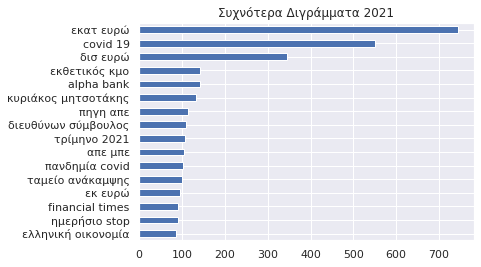

In [ ]:
results.sum(axis =0).sort_values(ascending = True).tail(16).plot.barh()
plt.title('Συχνότερα Διγράμματα 2021')

In [ ]:
df.dtypes

title               object
date        datetime64[ns]
category            object
body                object
url                 object
year                object
month               object
day                 object
length               int64
dtype: object

In [ ]:
import scipy
import seaborn as sns 
import sklearn.manifold
import json
import urllib.parse

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
import string
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [ ]:
df.body = [str (item) for item in df['body']]
df['tokenized'] = df['body'].map(lambda x: clean_text(x))

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tokenized'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(df['tokenized'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

In [ ]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['body'])
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')



In [ ]:
sns.set_theme()


In [ ]:
ax = sns.heatmap(arr[730:750, 730:750], vmin=0, vmax=1)

In [ ]:
#df.set_index('date' , inplace=True)

In [ ]:
#ax = df['positivity'].resample('D').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
#df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
#df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()